# Challenge 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('data/titanic.csv',low_memory=False)
titanic.sample(8)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
328,329,1.0,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,U0,S
1077,1078,NaN,2,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,U0,S
85,86,1.0,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,U0,S
721,722,0.0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,U0,S
1191,1192,NaN,3,"Olsson, Mr. Oscar Wilhelm",male,32.0,0,0,347079,7.7750,U0,S
376,377,1.0,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,U0,S
919,920,NaN,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
494,495,0.0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(include=[float, int]).sample(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1166,1167,NaN,2,20.000000,1,0,26.0
530,531,1.0,2,2.000000,1,1,26.0
185,186,0.0,1,52.158602,0,0,50.0


In [5]:
#your code here- categorical variable
titanic.select_dtypes(include=object).sample(3)

,Name,Gender,Ticket,Cabin,Embarked
661,"Badt, Mr. Mohamed",male,2623,U0,C
62,"Harris, Mr. Henry Birkhardt",male,36973,C83,S
267,"Persson, Mr. Ernst Ulrik",male,347083,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
plt.style.use("classic")
plt.figure(figsize = (12,6));

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

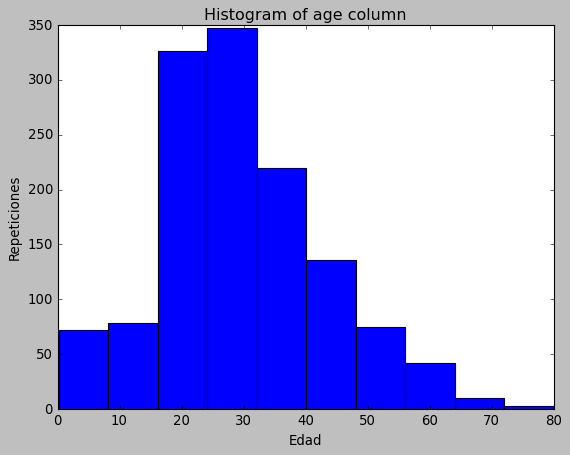

In [7]:
plt.hist(titanic["Age"])
plt.title("Histogram of age column")
plt.xlabel("Edad")
plt.ylabel("Repeticiones")
plt.show()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

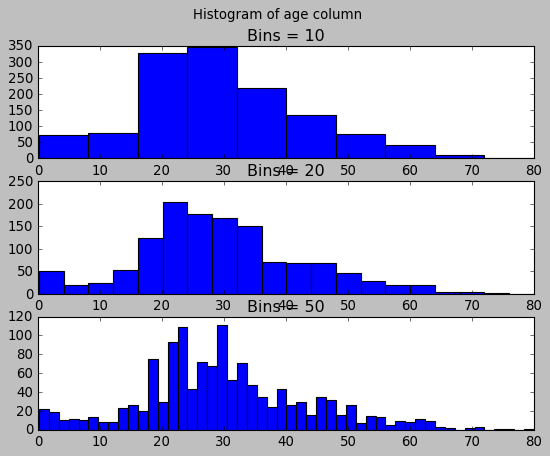

In [8]:
fig, axs = plt.subplots(3)
fig.suptitle('Histogram of age column')
axs[0].hist(titanic.Age, bins = 10)
axs[0].set_title('Bins = 10')
axs[1].hist(titanic.Age, bins = 20)
axs[1].set_title('Bins = 20')
axs[2].hist(titanic.Age, bins = 50)
axs[2].set_title('Bins = 50');

#### Whether the bin size affects your plot? Why?

The greater the bin, the more exact is the data (range of columns increase)

#### Use seaborn to show the distribution of the column `Age`

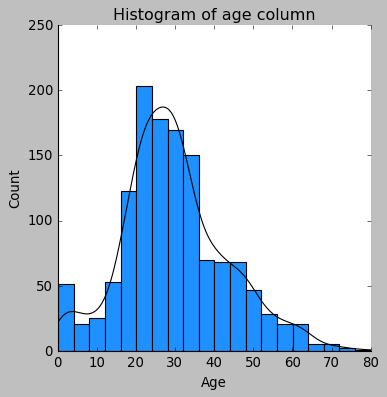

In [9]:
sns.displot(titanic.Age,
            facecolor='dodgerblue', # poner el color de relleno
            edgecolor = "black", # poner el color de la línea 
            bins=20, 
            color= "black" ,# para cambiar el color de la línea del kde
            kde=True) # para trazar una línea de densidad
plt.title('Histogram of age column');

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

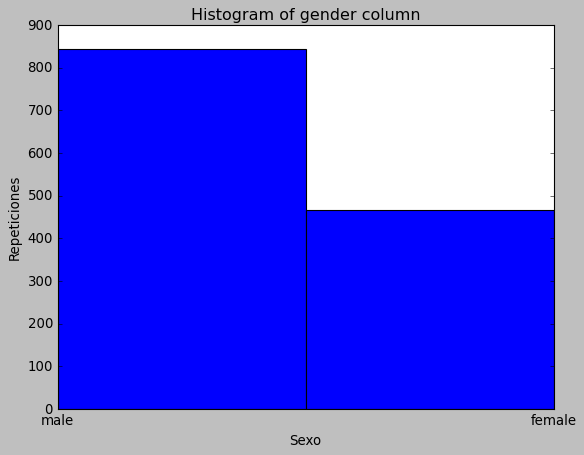

In [10]:
plt.hist(titanic["Gender"], bins=2)
plt.title("Histogram of gender column")
plt.xlabel("Sexo")
plt.ylabel("Repeticiones")
plt.show()

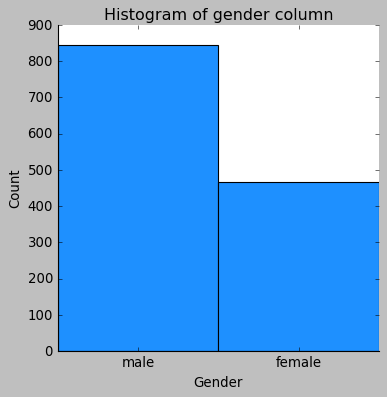

In [11]:
sns.displot(titanic.Gender,
            facecolor='dodgerblue', # poner el color de relleno
            edgecolor = "black") # poner el color de la línea 
plt.title('Histogram of gender column');

#### Use the appropriate plot to visualize the column `Pclass` 


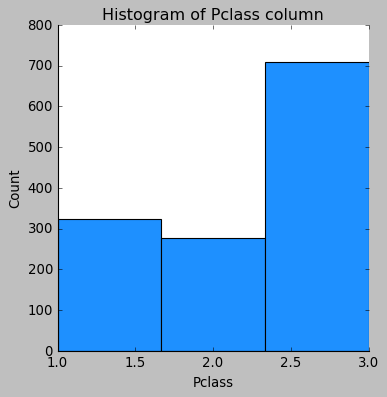

In [12]:
sns.displot(titanic.Pclass, facecolor='dodgerblue', edgecolor = "black", bins=3)
plt.title('Histogram of Pclass column');

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64


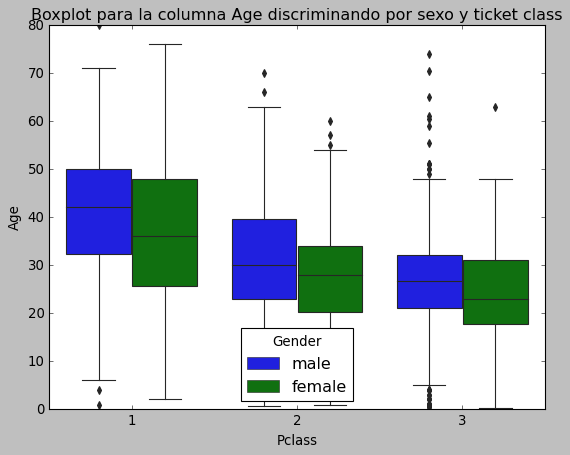

In [13]:
print(titanic.Age.describe())
sns.boxplot(titanic.Pclass, titanic.Age, hue=titanic.Gender)
plt.title('Boxplot para la columna Age discriminando por sexo y ticket class');

#### What does the previous plot tell you about the feature `Age`? Comment.

-The older you get, the more confies you need/can afford

-Most people were between their 20's and their 40's

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

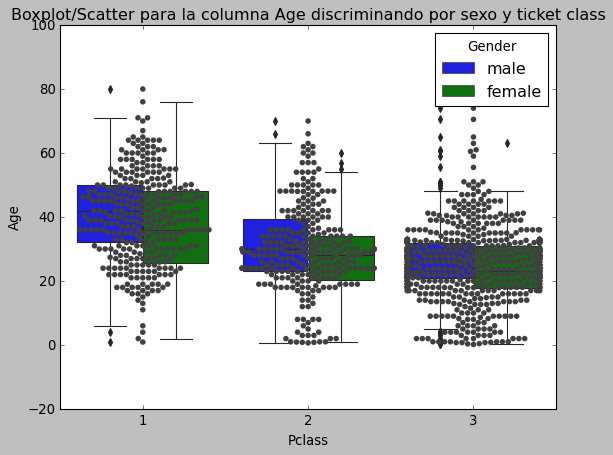

In [14]:
sns.boxplot(titanic.Pclass, titanic.Age, hue=titanic.Gender)
plt.title('Boxplot/Scatter para la columna Age discriminando por sexo y ticket class')
sns.swarmplot(x="Pclass", y="Age", data=titanic, color=".25");

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

Now I can see graphic distribution of the age along the Pclass

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

**USING SEABORN, AGREGO LA VARIABLE CATEGORICA GENDER AL ANALISIS**

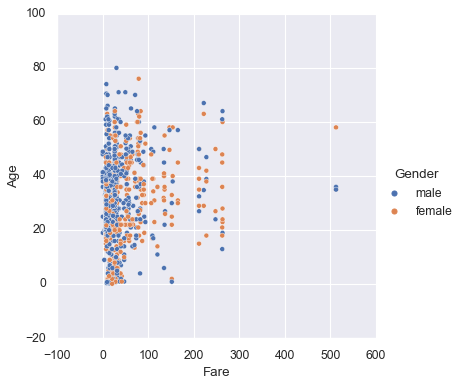

In [15]:
sns.set(style ="darkgrid")
sns.relplot(x ="Fare", y ="Age", 
            hue ="Gender", data = titanic);

**USING MATPLOTLIB, AGREGO LA VARIABLE CATEGORICA GENDER AL ANALISIS**

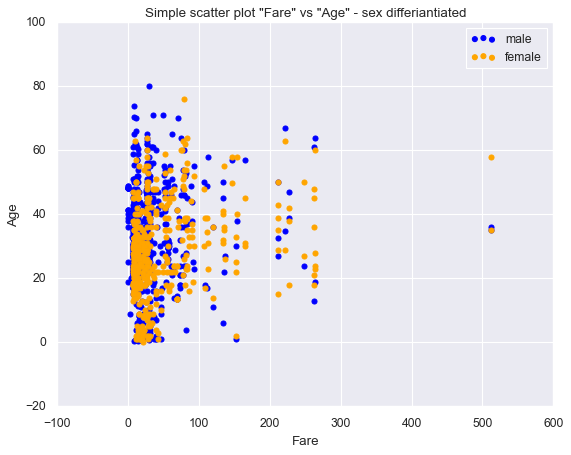

In [16]:
df_hombres = titanic[titanic.Gender=="male"]
df_mujeres = titanic[titanic.Gender=="female"]
plt.scatter(df_hombres['Fare'], df_hombres['Age'], label="male", color="blue")
plt.scatter(df_mujeres['Fare'], df_mujeres['Age'], label="female", color="orange")
plt.title('Simple scatter plot "Fare" vs "Age" - sex differiantiated')
plt.legend()
plt.xlabel("Fare")
plt.ylabel("Age");

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1005,1006,NaN,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.000000,1,0,PC 17483,221.7792,C55 C57,S
823,824,1.0,3,"Moor, Mrs. (Beila)",female,27.000000,0,1,392096,12.4750,E121,S
1257,1258,NaN,3,"Caram, Mr. Joseph",male,19.978627,1,0,2689,14.4583,U0,C
655,656,0.0,2,"Hickman, Mr. Leonard Mark",male,24.000000,2,0,S.O.C. 14879,73.5000,U0,S
1123,1124,NaN,3,"Wiklund, Mr. Karl Johan",male,21.000000,1,0,3101266,6.4958,U0,S
1049,1050,NaN,1,"Borebank, Mr. John James",male,42.000000,0,0,110489,26.5500,D22,S


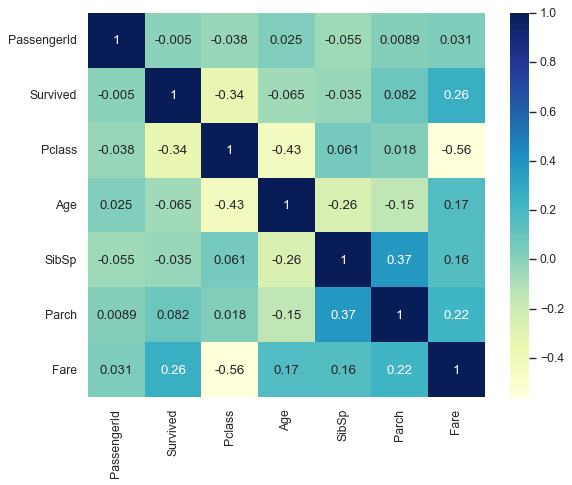

In [34]:
titanic.sample(5).reset_index()
sns.heatmap(titanic.corr(),
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación
titanic.sample(6)

#### According to the previous plot, what are the most correlated feature? Comment.

Ignorando SibSp y Parch que no se que son, los menos relacionados son Pclass y Fare y los mas relacionados son Age-Pclass y Survived-Fare. Con esto podemos concluir:
- Conforme aumenta el Pclass, disminuye el Fare, lo cual tiene sentido ya que son inversos (1st class + fare)
- Conforme aumenta la Age, disminuye el Pclass, igual que el anterior tienen logica inversa (1st class + edad/accesibilidad economica) 
- Conforme aumenta la Fare, menores son las probabilidades de sobrevivir, lo cual parece estar asociado que las clases/fares mas bajas/altas tuvieron mayor probabilidad de sobrevivir, quizas mejores equipos de emergencia

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

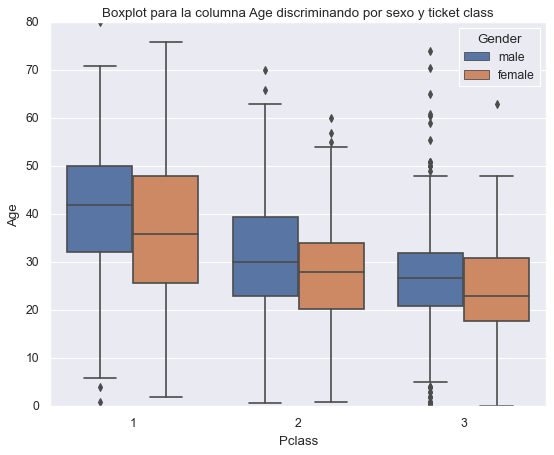

In [35]:
sns.boxplot(titanic.Pclass, titanic.Age, hue=titanic.Gender)
plt.title('Boxplot para la columna Age discriminando por sexo y ticket class');

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

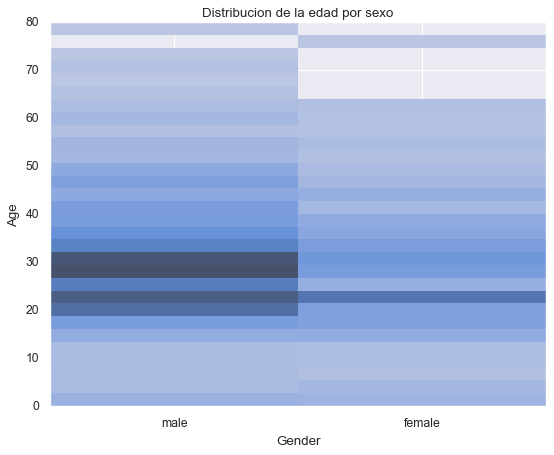

In [39]:
ax = sns.histplot(x ="Gender", y ="Age", data = titanic)
ax.set_title("Distribucion de la edad por sexo")
plt.show();